Preciso aleatoriezar com base no tipo
por exemplo, se cair que tem A tipos, eu preciso sortear um dos labels relativos a A, e assim por diante
a melhor forma de fazer isso é carregar os dois datasets, e com base neles, criar uma forma de criar uma base de vida normal do participante

Ordem sugerida: Dormindo, andando, atividades diárias, andando, se alimentando, andando, realizando esportes, andando, dormindo;

In [2]:
import pandas as pd
from random import randrange
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Datasets/normalizado.csv")

In [4]:
# Definindo os valores a serem deletados
valores_para_deletar = [1616, 1637, 1638, 1639, 1640]

# Filtrando o DataFrame para excluir essas linhas
dataset_filtrado = dataset[~dataset["pessoa_x"].isin(valores_para_deletar)]

mapeamento = {
    1650: 1637,
    1649: 1638,
    1648: 1639,
    1647: 1640,
    1646: 1616
}

# Substituindo os valores de pessoa_x conforme o mapeamento
dataset['pessoa_x'] = dataset['pessoa_x'].replace(mapeamento)

In [5]:
a = dataset[dataset["pessoa_x"] == 1616]
b = ["pessoa_x"]
for i in range(18):
    b.append("atividade_"+str(i))
for i in range(1600,1651):
    a = dataset[dataset["pessoa_x"] == i]
    print(a[b].value_counts())


pessoa_x  atividade_0  atividade_1  atividade_2  atividade_3  atividade_4  atividade_5  atividade_6  atividade_7  atividade_8  atividade_9  atividade_10  atividade_11  atividade_12  atividade_13  atividade_14  atividade_15  atividade_16  atividade_17
1600      0            0            0            0            0            0            0            0            0            0            0             0             0             0             0             0             0             1               4175
                                                                                                                                                                                                                                1             0               3604
                       1            0            0            0            0            0            0            0            0            0             0             0             0             0             0             0      

In [6]:
tempo = 200;

In [7]:
a = dataset[dataset["pessoa_x"] == 1616]
a = a[a["atividade_1"] == True]
a


,pessoa_x,tempo,acelerômetro_X,acelerômetro_Y,acelerômetro_Z,giroscópio_X,giroscópio_Y,giroscópio_Z,atividade_0,atividade_1,...,atividade_8,atividade_9,atividade_10,atividade_11,atividade_12,atividade_13,atividade_14,atividade_15,atividade_16,atividade_17
2850783,1616,1470231315294404,1.207201,-2.133386,0.380734,-1.082895,0.546008,0.974571,0,1,...,0,0,0,0,0,0,0,0,0,0
2850784,1616,1470231364794404,0.462490,-0.559243,-0.504404,-0.528392,0.836033,0.701256,0,1,...,0,0,0,0,0,0,0,0,0,0
2850785,1616,1470231414294404,-0.313889,0.748165,-0.625675,1.050167,-0.128829,0.153161,0,1,...,0,0,0,0,0,0,0,0,0,0
2850786,1616,1470231463794404,0.103925,0.867721,-0.490929,0.411386,-1.248606,-0.036621,0,1,...,0,0,0,0,0,0,0,0,0,0
2850787,1616,1470231513294404,0.819352,-0.782956,0.342169,1.111704,-0.882892,-0.548811,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854377,1616,1470410853186644,0.129464,-2.927704,1.172944,2.618027,1.244191,2.102268,0,1,...,0,0,0,0,0,0,0,0,0,0
2854378,1616,1470410903169314,2.690408,-2.927704,1.054461,2.828724,1.747135,3.562634,0,1,...,0,0,0,0,0,0,0,0,0,0
2854379,1616,1470410953151984,2.690408,-2.927704,0.061062,1.571227,1.989058,4.906494,0,1,...,0,0,0,0,0,0,0,0,0,0
2854380,1616,1470411003134654,2.690408,-2.447672,-0.498828,0.664893,1.854657,5.384245,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#matriz atividadade:
#[0] = andando
#[1] = parado
#[2] = atividades diárias
#[3] = alimentando
#[4] esportes

In [9]:
featuresX = ['acelerômetro_X', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_X', 'giroscópio_Y', 'giroscópio_Z']
atividades = [[0, 1, 2, 3],
           [3, 4, 2],
           [5, 6, 17, 16, 15, 5],
           [7, 8, 9, 10, 11, 5],
           [12, 14, 13, 3]]

ordemCerta = [1,0,2,0,3,0,4,0,1]
#parado, andandando, atividades diarias, andando, alimentando, andando, esportes, parado;

pessoasErradas = []

In [10]:
#grupo = atividade e dados = dataset 
def criar_atividade(numPessoa, grupo, dados, pessoaVazia):
    sort = randrange(grupo[-1])
    ativ = grupo[sort]
    atividade = dados.loc[(dados["pessoa_x"] == numPessoa) & (dados["atividade_"+str(ativ)] == True)]
    while(len(atividade) < 1000):
        sort = randrange(grupo[-1])
        ativ = grupo[sort]
        atividade = dados.loc[(dados["pessoa_x"] == numPessoa) & (dados["atividade_"+str(ativ)] == True)]
    atividade = atividade.tail(200)
    pessoaVazia = pd.concat([pessoaVazia, atividade])
    return pessoaVazia

In [11]:
def criar_pessoa(ordem, pessoaInicial, quantidadePessoas):
    arrayPessoas = []
    for j in range(pessoaInicial, (pessoaInicial+quantidadePessoas)):
        print("pessoa sendo calculada: ", j)
        for k in range(25):
            pessoa = pd.DataFrame(columns=dataset.columns)
            for i in range(len(ordem)):
                pessoa = criar_atividade(j, atividades[ordem[i]], dataset, pessoa)
            arrayPessoas.append(pessoa)
    return arrayPessoas

In [12]:
pessoasCertas = criar_pessoa(ordemCerta, 1600, 46)
len(pessoasCertas)

pessoa sendo calculada:  1600
pessoa sendo calculada:  1601
pessoa sendo calculada:  1602
pessoa sendo calculada:  1603
pessoa sendo calculada:  1604
pessoa sendo calculada:  1605
pessoa sendo calculada:  1606
pessoa sendo calculada:  1607
pessoa sendo calculada:  1608
pessoa sendo calculada:  1609
pessoa sendo calculada:  1610
pessoa sendo calculada:  1611
pessoa sendo calculada:  1612
pessoa sendo calculada:  1613
pessoa sendo calculada:  1614
pessoa sendo calculada:  1615
pessoa sendo calculada:  1616
pessoa sendo calculada:  1617
pessoa sendo calculada:  1618
pessoa sendo calculada:  1619
pessoa sendo calculada:  1620
pessoa sendo calculada:  1621
pessoa sendo calculada:  1622
pessoa sendo calculada:  1623
pessoa sendo calculada:  1624
pessoa sendo calculada:  1625
pessoa sendo calculada:  1626
pessoa sendo calculada:  1627
pessoa sendo calculada:  1628
pessoa sendo calculada:  1629
pessoa sendo calculada:  1630
pessoa sendo calculada:  1631
pessoa sendo calculada:  1632
pessoa sen

1150

In [13]:
ordemErrada = [3, 4, 2, 2, 4, 1, 0, 0, 4]
pessoasErradas = criar_pessoa(ordemErrada, 1600, 46)
len(pessoasErradas)

pessoa sendo calculada:  1600
pessoa sendo calculada:  1601
pessoa sendo calculada:  1602
pessoa sendo calculada:  1603
pessoa sendo calculada:  1604
pessoa sendo calculada:  1605
pessoa sendo calculada:  1606
pessoa sendo calculada:  1607
pessoa sendo calculada:  1608
pessoa sendo calculada:  1609
pessoa sendo calculada:  1610
pessoa sendo calculada:  1611
pessoa sendo calculada:  1612
pessoa sendo calculada:  1613
pessoa sendo calculada:  1614
pessoa sendo calculada:  1615
pessoa sendo calculada:  1616
pessoa sendo calculada:  1617
pessoa sendo calculada:  1618
pessoa sendo calculada:  1619
pessoa sendo calculada:  1620
pessoa sendo calculada:  1621
pessoa sendo calculada:  1622
pessoa sendo calculada:  1623
pessoa sendo calculada:  1624
pessoa sendo calculada:  1625
pessoa sendo calculada:  1626
pessoa sendo calculada:  1627
pessoa sendo calculada:  1628
pessoa sendo calculada:  1629
pessoa sendo calculada:  1630
pessoa sendo calculada:  1631
pessoa sendo calculada:  1632
pessoa sen

1150

In [14]:
print(ordemCerta)
print(ordemErrada)
print(len(pessoasCertas))
print(len(pessoasErradas))
pessoasCertas[8]

[1, 0, 2, 0, 3, 0, 4, 0, 1]
[3, 4, 2, 2, 4, 1, 0, 0, 4]
1150
1150


,pessoa_x,tempo,acelerômetro_X,acelerômetro_Y,acelerômetro_Z,giroscópio_X,giroscópio_Y,giroscópio_Z,atividade_0,atividade_1,...,atividade_8,atividade_9,atividade_10,atividade_11,atividade_12,atividade_13,atividade_14,atividade_15,atividade_16,atividade_17
17819,1600,80280935801879,1.277709,0.694615,-0.266508,-0.027849,-0.009262,0.012396,0,0,...,0,0,0,0,0,0,0,0,0,0
17820,1600,80280985737179,1.274644,0.681029,-0.258610,-0.011127,-0.002896,0.022654,0,0,...,0,0,0,0,0,0,0,0,0,0
17821,1600,80281035672479,1.275666,0.695067,-0.274407,-0.009789,-0.005018,0.032180,0,0,...,0,0,0,0,0,0,0,0,0,0
17822,1600,80281085607779,1.281795,0.710465,-0.273943,-0.021160,-0.007140,0.029982,0,0,...,0,0,0,0,0,0,0,0,0,0
17823,1600,80281135543079,1.266812,0.684652,-0.283700,-0.069319,-0.007140,0.033645,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14410,1600,79996964469308,0.401367,0.090216,1.201868,0.019586,0.020798,-0.011739,0,0,...,0,0,0,0,0,0,0,0,0,0
14411,1600,79997014389748,0.409199,0.085687,1.202797,0.036977,0.017969,-0.012472,0,0,...,0,0,0,0,0,0,0,0,0,0
14412,1600,79997064310188,0.402048,0.112859,1.206979,0.051023,0.018676,-0.015403,0,0,...,0,0,0,0,0,0,0,0,0,0
14413,1600,79997114230628,0.401708,0.116934,1.219524,0.038983,0.027164,-0.008808,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#tamanho da entrada: quantidade de uma atividade (3600) vezes a quantidade de atividades (9)

In [16]:
def treino(certos, errados):
    treino = np.empty((0, tempo*len(ordemCerta), 6))
    label = []
    for i in range(1600//2):
        pessoa = certos[i]
        array = pessoa[featuresX].values
        reshape = array.reshape(1,array.shape[0],6)
        treino = np.concatenate([treino, reshape])
        label.append(0)

        pessoa = errados[i]
        array = pessoa[featuresX].values
        reshape = array.reshape(1,array.shape[0],6)
        treino = np.concatenate([treino, reshape])
        label.append(1)
    label = np.array(label)
    print(treino.shape)
    print(label.shape)
    return treino, label

In [17]:
def teste(certos, errados):
    teste = np.empty((0, tempo*len(ordemCerta), 6))
    label = []
    for i in range(1600//2,1850//2):
        pessoa = certos[i]
        array = pessoa[featuresX].values
        reshape = array.reshape(1,array.shape[0],6)
        teste = np.concatenate([teste, reshape])
        label.append(0)


        pessoa = errados[i]
        array = pessoa[featuresX].values
        reshape = array.reshape(1,array.shape[0],6)
        teste = np.concatenate([teste, reshape])
        label.append(1)
    label = np.array(label)
    print(teste.shape)
    print(label.shape)
    return teste, label

In [18]:
def validacao(certos, errados):
    validacao = np.empty((0,tempo*len(ordemCerta), len(featuresX)))
    label = []
    for i in range(1850//2, 2300//2):
        pessoa = certos[i]
        array = pessoa[featuresX].values
        reshape = array.reshape(1, array.shape[0], 6)
        validacao = np.concatenate([validacao, reshape])
        label.append(0)

        pessoa = errados[i]
        array = pessoa[featuresX].values
        reshape = array. reshape(1,array.shape[0], 6)
        validacao = np.concatenate([validacao, reshape])
        label. append(1)
    label = np.array(label)
    print(validacao.shape)
    print(label.shape)
    return validacao, label


In [19]:
trainX, trainY = treino(pessoasCertas, pessoasErradas)
testX, testY = teste(pessoasCertas, pessoasErradas)
valX, valY = validacao(pessoasCertas, pessoasErradas)

(1600, 1800, 6)
(1600,)
(250, 1800, 6)
(250,)
(450, 1800, 6)
(450,)


In [20]:
trainX[0]

array([[ 1.27770891,  0.69461456, -0.26650846, -0.02784869, -0.0092619 ,
         0.0123957 ],
       [ 1.27464423,  0.68102875, -0.2586096 , -0.01112666, -0.00289551,
         0.02265416],
       [ 1.27566584,  0.69506742, -0.27440733, -0.00978889, -0.00501764,
         0.03217989],
       ...,
       [ 0.40204809,  0.11285857,  1.20697851,  0.05102328,  0.01867594,
        -0.01540274],
       [ 0.40170756,  0.11693431,  1.21952368,  0.03898342,  0.02716446,
        -0.00880801],
       [ 0.40681532,  0.11965147,  1.23113985, -0.00583162,  0.01513906,
        -0.00514427]])

In [21]:
# taxa de aprendizado padrão ADAM 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [22]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation, optimizer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
  #model.add(tf.keras.layers.Dropout(rate=0.5))
  #model.add(tf.keras.layers.LSTM(activation=activation[0], units=(hidden_units//2)))
  model.add(tf.keras.layers.Dropout(rate=0.5))
  model.add(tf.keras.layers.Dense(units=dense_units, activation=activation[2]))
  model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])
  return model

model = cria_LSTM(hidden_units=16, dense_units=1, input_shape=(trainX.shape[1], len(featuresX)), activation=['tanh', 'softmax','sigmoid'], optimizer=optimizer)


In [23]:
def reset_model():
    model = cria_LSTM(hidden_units=16, dense_units=1, input_shape=(trainX.shape[1], len(featuresX)), activation=['tanh', 'relu','sigmoid'], optimizer=optimizer)

In [23]:
reset_model()
history = model.fit(trainX, trainY, epochs = 150, batch_size = 50, verbose = 1, validation_data=(valX, valY))

Epoch 1/150
32/32 [==============================] - 31s 879ms/step - loss: 0.6899 - accuracy: 0.5400 - val_loss: 0.6242 - val_accuracy: 0.7089
Epoch 2/150
32/32 [==============================] - 27s 848ms/step - loss: 0.5906 - accuracy: 0.7219 - val_loss: 0.5173 - val_accuracy: 0.7911
Epoch 3/150
32/32 [==============================] - 27s 833ms/step - loss: 0.4330 - accuracy: 0.8606 - val_loss: 0.4173 - val_accuracy: 0.8289
Epoch 4/150
32/32 [==============================] - 20s 614ms/step - loss: 0.2931 - accuracy: 0.9144 - val_loss: 0.3385 - val_accuracy: 0.8667
Epoch 5/150
32/32 [==============================] - 13s 418ms/step - loss: 0.2539 - accuracy: 0.9306 - val_loss: 0.2798 - val_accuracy: 0.9022
Epoch 6/150
32/32 [==============================] - 14s 432ms/step - loss: 0.1916 - accuracy: 0.9556 - val_loss: 0.2955 - val_accuracy: 0.8644
Epoch 7/150
32/32 [==============================] - 14s 425ms/step - loss: 0.1640 - accuracy: 0.9700 - val_loss: 0.3103 - val_accuracy:

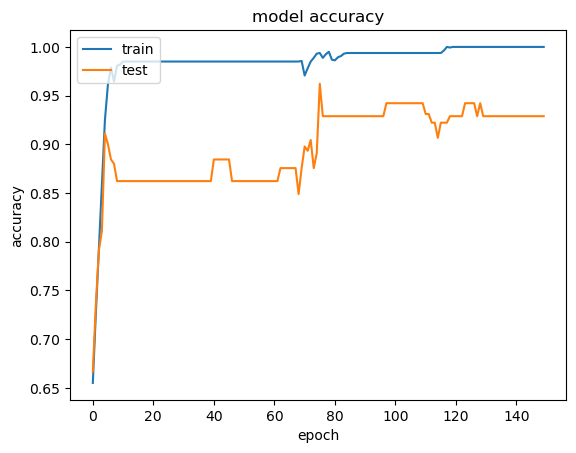

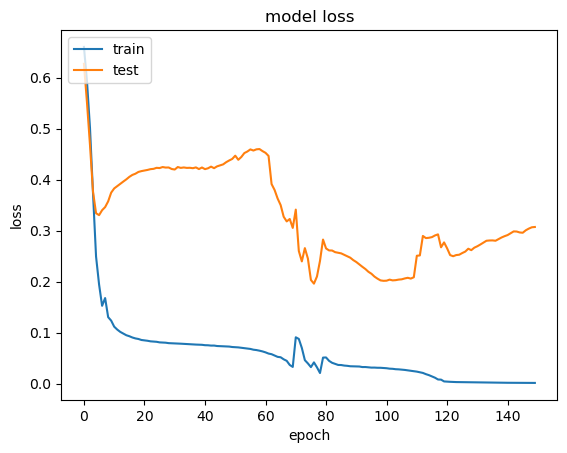

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()